# DeepOF analysis of DLS homecage data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import deepof.data

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Creating and running the DLS project

In [4]:
SI_deepof_project = deepof.data.Project(
                project_path=os.path.join("../DLS_data/DeepOF/SI"),
                video_path=os.path.join("../DLS_data/DeepOF/SI/Videos/"),
                table_path=os.path.join("../DLS_data/DeepOF/SI/Tables/"),
                project_name="DLS_SI_project",
                arena="circular-autodetect",
                animal_ids=["B", "W"],
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                smooth_alpha=1,
                exp_conditions=None,
)
SI_deepof_project.run_numba = False
SI_deepof_project.run_numba

False

In [5]:
# SI_deepof_project = SI_deepof_project.create(force=True)

In [6]:
# Load a previously saved project
SI_deepof_project = deepof.data.load_project("../DLS_data/DeepOF/SI/DLS_SI_project")

In [7]:
print(SI_deepof_project)
print(type(SI_deepof_project))

deepof analysis of 87 videos
<class 'deepof.data.Coordinates'>


In [8]:
SI_deepof_project.get_coords(polar=False, center="Center", align="Spine_1")['ID10_Socialinteraction1']

B_Spine_1            B_Center      B_Left_bhip            \
                           x          y        x    y           x         y   
00:00:00                 0.0  14.308855      0.0  0.0   11.006174 -4.123887   
00:00:00.066607361       0.0  14.308855      0.0  0.0   11.006174 -4.123887   
00:00:00.133214722       0.0  14.308855      0.0  0.0   11.006174 -4.123887   
00:00:00.199822083       0.0  13.307343      0.0  0.0   10.730682 -3.868402   
00:00:00.266429445       0.0  12.227364      0.0  0.0   10.851278 -3.411286   
...                      ...        ...      ...  ...         ...       ...   
00:09:58.666963193       0.0  13.189832      0.0  0.0    7.798713 -8.085161   
00:09:58.733570554       0.0  12.333720      0.0  0.0    8.741150 -6.921457   
00:09:58.800177916       0.0  11.654252      0.0  0.0    9.192288 -6.179545   
00:09:58.866785277       0.0  11.654252      0.0  0.0    9.192288 -6.179545   
00:09:58.933392638       0.0  11.654252      0.0  0.0    9.192288 -6.179545   

                   B_Left_ear            B_Left_fhip             ...  \
                            x          y           x          y  ...   
00:00:00             5.933169  20.141611    7.242476   9.100161  ...   
00:00:00.066607361   5.933169  20.141611    7.242476   9.100161  ...   
00:00:00.133214722   5.933169  20.141611    7.242476   9.100161  ...   
00:00:00.199822083   4.867759  20.248179    7.577248   9.713220  ...   
00:00:00.266429445   4.275010  19.731796    7.556546  10.471491  ...   
...                       ...        ...         ...        ...  ...   
00:09:58.666963193   9.057453  19.740228    9.144086   7.411654  ...   
00:09:58.733570554   5.672236  20.407983    8.377906   8.334143  ...   
00:09:58.800177916   5.854027  19.534359    8.443094   8.487365  ...   
00:09:58.866785277   5.854027  19.534359    8.443094   8.487365  ...   
00:09:58.933392638   5.854027  19.534359    8.443094   8.487365  ...   

                   W_Right_bhip           W_Right_ear            W_Right_fhip  \
                              x         y           x          y            x   
00:00:00             -10.936743 -8.259217  -10.519628  19.551203    -8.204121   
00:00:00.066607361   -10.936743 -8.259217  -10.519628  19.551203    -8.204121   
00:00:00.133214722   -10.936743 -8.259217  -10.519628  19.551203    -8.204121   
00:00:00.199822083   -12.547714 -6.596836  -10.551304  23.718284    -6.883330   
00:00:00.266429445   -11.441043 -8.487990   -8.076831  18.530928    -9.853699   
...                         ...       ...         ...        ...          ...   
00:09:58.666963193   -12.091216 -7.054764   -6.419522  22.634207    -6.173173   
00:09:58.733570554   -12.115028 -6.750697   -6.647236  21.887657    -6.337224   
00:09:58.800177916   -11.967614 -6.398399   -6.892380  20.898811    -6.496028   
00:09:58.866785277   -11.967614 -6.398399   -6.892380  20.898811    -6.496028   
00:09:58.933392638   -11.967614 -6.398399   -6.892380  20.898811    -6.496028   

                              W_Spine_2            W_Tail_base             
                            y         x          y           x          y  
00:00:00            18.697786  0.348206 -12.822770    0.400376 -21.730989  
00:00:00.066607361  18.697786  0.348206 -12.822770    0.400376 -21.730989  
00:00:00.133214722  18.697786  0.348206 -12.822770    0.400376 -21.730989  
00:00:00.199822083  12.715692 -1.125925 -13.488010   -3.529130 -23.372492  
00:00:00.266429445  11.022245 -0.274175 -15.514267   -1.313305 -26.005837  
...                       ...       ...        ...         ...        ...  
00:09:58.666963193  11.801799 -0.266726 -14.124672   -1.043433 -22.373279  
00:09:58.733570554  11.147971 -0.142008 -13.908422   -0.973803 -22.558285  
00:09:58.800177916  10.526220 -0.055726 -13.459021   -0.813168 -22.113139  
00:09:58.866785277  10.526220 -0.055726 -13.459021   -0.813168 -22.113139  
00:09:58.933392638  10.526220 -0.055726 -13.459021   -0.813168 -22.113139  

[8993 rows 

In [9]:
SI_deepof_project.get_distances()['ID10_Socialinteraction1']

,"(B_Center, B_Right_fhip)","(W_Left_ear, W_Nose)","(W_Right_bhip, W_Spine_2)","(W_Center, W_Left_fhip)","(B_Left_bhip, B_Spine_2)","(B_Center, B_Spine_2)","(W_Nose, W_Right_ear)","(W_Center, W_Spine_2)","(B_Tail_base, W_Tail_base)","(B_Left_ear, B_Nose)",...,"(W_Left_ear, W_Spine_1)","(W_Spine_2, W_Tail_base)","(B_Right_ear, B_Spine_1)","(B_Tail_base, W_Nose)","(B_Center, B_Left_fhip)","(B_Left_ear, B_Spine_1)","(B_Spine_2, B_Tail_base)","(B_Nose, W_Nose)","(W_Right_ear, W_Spine_1)","(B_Center, B_Spine_1)"
00:00:00,15.014864,16.368531,15.787198,19.995658,14.348288,15.973032,19.792633,16.636344,141.351287,14.070704,...,14.979638,11.553519,10.751449,88.639703,15.083806,10.790531,14.693330,20.396026,13.664927,18.557560
00:00:00.066607361,15.014864,16.368531,15.787198,19.995658,14.348288,15.973032,19.792633,16.636344,141.351287,14.070704,...,14.979638,11.553519,10.751449,88.639703,15.083806,10.790531,14.693330,20.396026,13.664927,18.557560
00:00:00.133214722,15.014864,16.368531,15.787198,19.995658,14.348288,15.973032,19.792633,16.636344,141.351287,14.070704,...,14.979638,11.553519,10.751449,88.639703,15.083806,10.790531,14.693330,20.396026,13.664927,18.557560
00:00:00.199822083,14.338934,20.366176,17.300535,23.705895,14.516869,15.395729,21.348244,17.553824,137.508564,13.537458,...,15.135233,13.192915,11.019154,84.292609,15.977048,10.994885,14.116418,19.819966,13.688407,17.258670
00:00:00.266429445,11.837927,17.321575,17.110977,18.351999,15.830557,15.714486,22.903804,20.124034,131.422701,14.969342,...,14.763830,13.673391,11.501838,82.492409,16.747634,11.201153,13.841677,19.757619,10.526640,15.858014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:58.666963193,14.686161,22.064934,17.867614,17.369686,15.406184,15.337363,13.424281,18.321952,66.744245,16.306404,...,15.174864,10.745174,11.559951,62.831393,15.265619,14.496917,10.857512,19.511638,12.000176,17.106266
00:09:58.733570554,13.772723,22.364028,18.091394,17.523203,16.528403,14.743051,13.548685,18.039166,68.154022,13.860750,...,14.851007,11.270002,13.461291,62.422404,15.326119,12.797468,10.437144,18.377878,11.989545,15.995951
00:09:58.800177916,13.836132,23.488080,17.958850,17.780607,16.867913,13.629242,10.337622,17.455535,69.940724,17.163442,...,14.371032,11.266678,13.342340,57.677389,15.526415,12.731432,10.213031,22.275105,12.079567,15.114729
00:09:58.866785277,13.836132,23.488080,17.958850,17.780607,16.867913,13.629242,10.337622,17.455535,69.940724,17.163442,...,14.371032,11.266678,13.342340,57.677389,15.526415,12.731432,10.213031,22.275105,12.079567,15.114729


In [10]:
SI_deepof_project.get_angles()['ID1_Socialinteraction1']

,"(B_Nose, B_Left_ear, B_Spine_1)","(B_Right_fhip, B_Center, B_Left_fhip)","(B_Right_fhip, B_Center, B_Spine_1)","(B_Right_fhip, B_Center, B_Spine_2)","(B_Left_fhip, B_Center, B_Spine_1)","(B_Left_fhip, B_Center, B_Spine_2)","(B_Spine_1, B_Center, B_Spine_2)","(B_Nose, B_Right_ear, B_Spine_1)","(B_Left_ear, B_Nose, B_Right_ear)","(B_Left_ear, B_Spine_1, B_Center)",...,"(W_Left_ear, W_Nose, W_Right_ear)","(W_Left_ear, W_Spine_1, W_Center)","(W_Left_ear, W_Spine_1, W_Right_ear)","(W_Center, W_Spine_1, W_Right_ear)","(W_Center, W_Spine_2, W_Right_bhip)","(W_Center, W_Spine_2, W_Left_bhip)","(W_Center, W_Spine_2, W_Tail_base)","(W_Right_bhip, W_Spine_2, W_Left_bhip)","(W_Right_bhip, W_Spine_2, W_Tail_base)","(W_Left_bhip, W_Spine_2, W_Tail_base)"
00:00:00,1.247418,1.397854,1.352659,1.322648,1.342787,1.312776,1.345154,1.344804,1.309695,1.318044,...,1.050001,1.180201,0.932487,0.773827,0.799312,0.895428,0.970659,0.831206,0.906437,0.934553
00:00:00.066614855,NaN,1.253716,1.323536,1.265540,1.439315,1.413141,1.351182,NaN,1.387033,1.420903,...,1.172567,0.750320,1.032263,1.246187,0.725589,0.712590,0.613921,0.730256,0.653676,0.722567
00:00:00.133229710,1.469888,1.403815,1.437307,1.525853,1.295902,1.379128,1.445015,1.365771,NaN,1.362192,...,0.794542,0.813664,0.990635,0.853726,0.940270,0.966961,0.866612,0.950156,0.847544,0.791161
00:00:00.199844565,1.245514,1.397253,1.343147,1.323936,1.333401,1.314190,1.346579,1.339491,1.327281,1.319738,...,1.000177,1.135154,0.891525,0.736234,0.795996,0.887374,0.973691,0.822947,0.909263,0.937553
00:00:00.266459420,NaN,1.260607,1.328288,1.276441,1.440045,1.420316,1.359639,NaN,1.394260,1.423969,...,1.113615,0.750500,0.977372,1.196723,0.735802,0.714740,0.619891,0.731891,0.660284,0.729674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:59.666925724,NaN,0.197937,0.119016,0.304760,0.085867,0.235661,0.270318,NaN,0.162373,0.212697,...,0.008121,0.164219,0.093832,0.201368,0.028396,0.009430,0.159874,0.011417,0.136011,0.128266
00:09:59.733540579,0.025868,0.117228,0.084670,0.039912,0.206099,0.161341,0.087813,0.032629,NaN,0.098474,...,0.083175,0.136756,0.015202,0.191152,0.008861,0.140533,0.097609,0.067957,0.025033,0.040998
00:09:59.800155434,0.239821,0.112424,0.131432,0.121742,0.247481,0.229305,0.197078,0.159264,0.078034,0.173467,...,0.179620,0.125191,0.015037,0.041287,0.094372,0.060635,0.029407,0.115622,0.079863,0.050396
00:09:59.866770289,NaN,0.185744,0.108570,0.290595,0.079282,0.226739,0.251916,NaN,0.157008,0.200965,...,0.032528,0.166614,0.118730,0.209880,0.045064,0.000816,0.169739,0.002279,0.144461,0.137494


In [11]:
SI_deepof_project.get_areas()['ID1_Socialinteraction1']

,B_head_area,B_torso_area,B_back_area,B_full_area,W_head_area,W_torso_area,W_back_area,W_full_area
00:00:00,92.576969,110.759878,161.162494,536.122977,118.048308,357.827676,428.586674,1085.491276
00:00:00.066614855,92.576969,110.759878,161.162494,536.122977,118.048308,357.827676,428.586674,1085.491276
00:00:00.133229710,92.576969,110.759878,161.162494,536.122977,118.048308,357.827676,428.586674,1085.491276
00:00:00.199844565,135.856182,195.510013,275.633781,721.494283,124.207120,325.840129,421.463523,1043.187691
00:00:00.266459420,136.927389,259.479030,320.365704,829.161713,135.364182,329.428108,409.515281,1100.354904
...,...,...,...,...,...,...,...,...
00:09:59.666925724,53.134569,179.445086,195.816240,511.592571,150.322576,187.258737,201.916606,669.156999
00:09:59.733540579,50.433306,180.035917,186.725715,503.085708,144.535668,277.699126,338.934264,876.085765
00:09:59.800155434,57.045866,184.335014,193.723303,500.351190,201.445237,317.258278,406.259044,1049.170470
00:09:59.866770289,57.045866,184.335014,193.723303,500.351190,201.445237,317.258278,406.259044,1049.170470


In [12]:
pd.read_csv("../DLS_data/DeepOF/SI/DLS_labels.csv", index_col=0)

,experiment_id,Session,CSDS
0,ID1_Socialinteraction1,First,Stressed
1,ID2_Socialinteraction1,First,Stressed
2,ID3_Socialinteraction1,First,Stressed
3,ID4_Socialinteraction1,First,Stressed
4,ID5_Socialinteraction1,First,Stressed
...,...,...,...
82,ID40_Socialinteraction2,Second,Control
83,ID41_Socialinteraction2,Second,Control
84,ID42_Socialinteraction2,Second,Control
85,ID43_Socialinteraction2,Second,Control


In [13]:
SI_deepof_project.load_exp_conditions("../DLS_data/DeepOF/SI/DLS_labels.csv")

In [14]:
SI_deepof_project.get_exp_conditions['ID1_Socialinteraction1']

,Session,CSDS
0,First,Stressed


### Supervised annotation

In [15]:
supervised_annotation = SI_deepof_project.supervised_annotation()

100%|██████████| 87/87 [00:09<00:00,  9.58it/s]


### Add time in zone

In [16]:
arena_centered_coords = SI_deepof_project.get_coords(polar=False, center="arena")

In [17]:
import numpy as np
from scipy.spatial.distance import cdist

def distance_to_center(centered_coords, bodypart="Center"):
    return cdist(centered_coords[bodypart].values, np.array([[0, 0]])).flatten()

def in_center(centered_coords, bodypart="Center", center_fraction=0.6, arena_radius=380 / 2):
    return (distance_to_center(centered_coords, bodypart) < center_fraction * arena_radius).astype(float)

for key, value in supervised_annotation.items():
    for animal_ID in SI_deepof_project._animal_ids:
        supervised_annotation[key][f"{animal_ID}_in_center"] = in_center(arena_centered_coords[key], bodypart=f"{animal_ID}_Center")

In [18]:
# Export as a csv file
supervised_annotation_df = pd.concat(supervised_annotation.filter_id("B"))
supervised_annotation_df.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/DLS_SI_labels.csv")

In [19]:
# Export as a CSV file grouped by video
supervised_annotation_df_agg = (supervised_annotation_df.reset_index().drop(columns=["level_1"]).rename(columns={"level_0": "ID"}).groupby("ID").sum() / 15).drop(columns=["B_speed"])
supervised_annotation_df_agg["B_speed"] = supervised_annotation_df.reset_index().drop(columns=["level_1"]).rename(columns={"level_0": "ID"}).groupby("ID").B_speed.mean()
supervised_annotation_df_agg["B_center_entries"] = supervised_annotation_df.reset_index().drop(columns=["level_1"]).rename(columns={"level_0": "ID"}).groupby("ID").B_in_center.apply(lambda x: sum(x[1:].values != x[:-1].values))
supervised_annotation_df_agg = pd.merge(supervised_annotation_df_agg, pd.concat(SI_deepof_project.get_exp_conditions).reset_index().drop(columns=["level_1"]).rename(columns={"level_0": "ID"}).set_index("ID"), left_index=True, right_index=True)
supervised_annotation_df_agg.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/DLS_SI_labels_aggregated.csv")

In [20]:
supervised_annotation_df_agg.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/DLS_SI_labels_aggregated.xlsx")

### Social interaction stability measures

In [46]:
control_means = {"First": supervised_annotation_df_agg[(supervised_annotation_df_agg["Session"] == "First") & (supervised_annotation_df_agg["CSDS"] == "Control")].mean(),
                 "Second": supervised_annotation_df_agg[(supervised_annotation_df_agg["Session"] == "Second") & (supervised_annotation_df_agg["CSDS"] == "Control")].mean()}
control_stds = {"First": supervised_annotation_df_agg[(supervised_annotation_df_agg["Session"] == "First") & (supervised_annotation_df_agg["CSDS"] == "Control")].std(),
                "Second": supervised_annotation_df_agg[(supervised_annotation_df_agg["Session"] == "Second") & (supervised_annotation_df_agg["CSDS"] == "Control")].std()}

def z_score_normalize(row):
    z_means = control_means[row["Session"]]
    z_stds = control_stds[row["Session"]]

    # Drop the session and CSDS columns
    z_row = row.drop(["Session", "CSDS"])
    z_row = (z_row - z_means) / z_stds

    # Add the session and CSDS columns back
    z_row["Session"] = row["Session"]
    z_row["CSDS"] = row["CSDS"]

    return z_row

def compute_stability(pair):
    
    ols_dict = {}
    for column in pair.columns:
        if column not in ["Session", "ID", "CSDS"]:
            col_input = [pair.loc[pair.Session=="First"][column].values[0], pair.loc[pair.Session=="Second"][column].values[0]]

            # Compute the mean and the slope between the two points
            ols_dict[column] = [np.mean(col_input), (col_input[1] - col_input[0])]

    # Add a multi index with the ID and Mean, Slope
    return pd.DataFrame(ols_dict, index=pd.MultiIndex.from_tuples([(pair.ID.values[0], "Mean"), (pair.ID.values[0], "Slope")]))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Stressed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.639e-05 U_stat=3.880e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Stressed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.532e-02 U_stat=3.130e+02


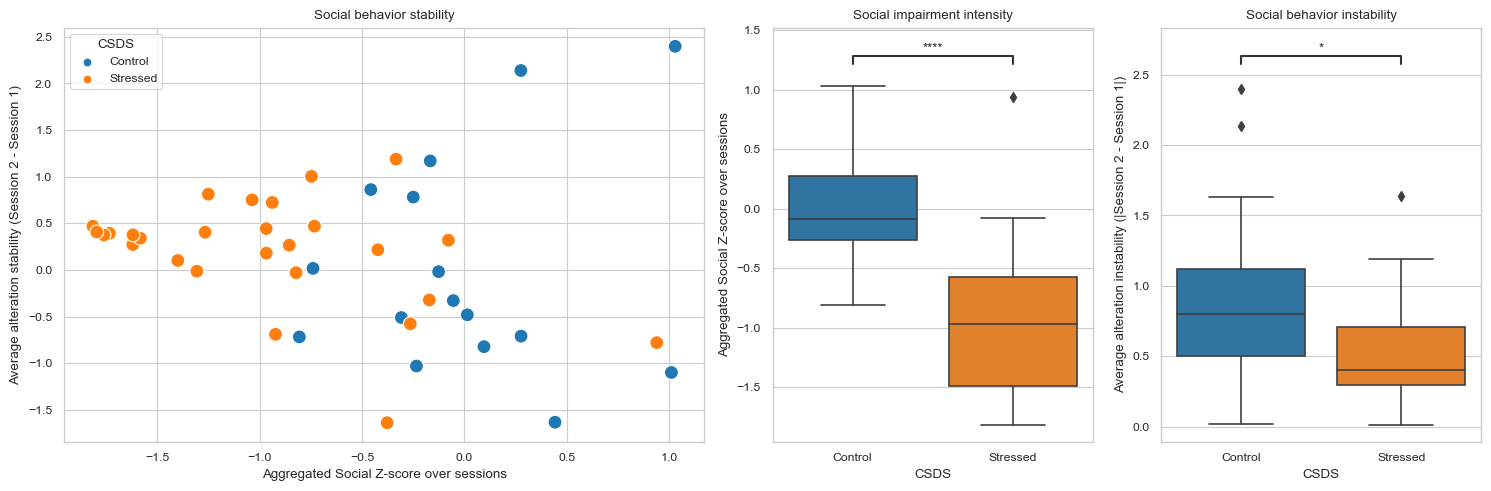

In [47]:
from statannotations.Annotator import Annotator

z_scored_SI_features = supervised_annotation_df_agg.apply(lambda x: z_score_normalize(x), axis=1).loc[:, [beh for beh in supervised_annotation_df_agg.columns if "B_W" in beh] + ["Session", "CSDS"]]

z_scored_SI_features.reset_index(inplace=True)
z_scored_SI_features.ID = z_scored_SI_features.ID.str.replace("_Socialinteraction1", "")
z_scored_SI_features.ID = z_scored_SI_features.ID.str.replace("_Socialinteraction2", "")

z_scored_stability = {}
for ID in z_scored_SI_features.ID.unique():
    try:
        z_scored_stability[ID] = compute_stability(z_scored_SI_features.loc[z_scored_SI_features.ID == ID])
    except IndexError:
        pass

z_scored_stability = pd.concat(z_scored_stability.values())

# Add conditions to the stability dataframe
exp_conditions = pd.concat(SI_deepof_project.get_exp_conditions).reset_index().drop(columns=["level_1", "Session"]).rename(columns={"level_0": "ID"})
exp_conditions.ID = exp_conditions.ID.str.split("_").apply(lambda x: x[0])
exp_conditions.drop_duplicates(inplace=True)
z_scored_stability["ID"] = z_scored_stability.index.get_level_values(0)
z_scored_stability["CSDS"] = z_scored_stability["ID"].map(exp_conditions.set_index("ID").CSDS)
z_scored_stability = z_scored_stability.reset_index().drop("level_0", axis=1).rename(columns={"level_1": "Stat"}).set_index(["ID", "CSDS", "Stat"])

# Subplots with different widths
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1, 1]})

# Stability overview
sns.scatterplot(data=z_scored_stability.mean(axis=1).unstack().sort_values("CSDS"), x="Mean", y="Slope", s=100, hue="CSDS", ax=axes[0])
axes[0].set_title("Social behavior stability")
axes[0].set_xlabel("Aggregated Social Z-score over sessions")
axes[0].set_ylabel("Average alteration stability (Session 2 - Session 1)")

# Aggregated Z-score marginals as box plot
box_1_df = z_scored_stability.mean(axis=1).unstack().sort_values("CSDS").reset_index()
sns.boxplot(data=box_1_df, x="CSDS", y="Mean", ax=axes[1])
axes[1].set_ylabel("Aggregated Social Z-score over sessions")
axes[1].set_title("Social impairment intensity")

# Add statistical annotations
annotator = Annotator(axes[1], [("Control", "Stressed")], data=box_1_df, x="CSDS", y="Mean")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Aggregated slope variability as box plot
box_2_df = z_scored_stability.mean(axis=1).unstack().sort_values("CSDS").abs().reset_index()
sns.boxplot(data=box_2_df, x="CSDS", y="Slope", ax=axes[2])
axes[2].set_ylabel("Average alteration instability (|Session 2 - Session 1|)")
axes[2].set_title("Social behavior instability")

# Add statistical annotations
annotator = Annotator(axes[2], [("Control", "Stressed")], data=box_2_df, x="CSDS", y="Slope")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/Aggregated_SI_social_stability.pdf")
plt.show()


In [ ]:
z_scored_stability = z_scored_stability.mean(axis=1).unstack().sort_values("CSDS")
z_scored_stability.rename(columns={"Mean": "Aggregated Social Z-score over sessions", "Slope": "Average alteration stability (Session 2 - Session 1)"}, inplace=True)
z_scored_stability.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/DLS_SI_social_stability.csv")
z_scored_stability.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/DLS_SI_social_stability.xlsx")

### Train unsupervised model

In [24]:
# This code will generate a dataset using graph representations, as well a some auxiliary objects
(
    graph_preprocessed_coords,
    adj_matrix,
    to_preprocess,
    global_scaler,
) = SI_deepof_project.get_graph_dataset(
    center="Center",
    align="Spine_1",
    animal_id="B",
    window_size=25,
    window_step=1,
    test_videos=1,
    preprocess=True,
    scale="standard",
)

In [25]:
trained_model = SI_deepof_project.deep_unsupervised_embedding(
    preprocessed_object=graph_preprocessed_coords,  # Change to preprocessed_coords to use non-graph embeddings
    adjacency_matrix=adj_matrix,  # Change to None to use non-graph embeddings
    embedding_model="Contrastive",  # Can also be set to 'VQVAE' and 'Contrastive'
    epochs=25,
    encoder_type="recurrent",  # Can also be set to 'TCN' and 'transformer'
    n_components=10,
    latent_dim=16,
    batch_size=1024,
    verbose=True,  # Set to True to follow the training loop
    interaction_regularization=0.0,
    pretrained=True,  # Set to False to train a new model!
)

In [26]:
# Get embeddings, soft_counts, and breaks per video
embeddings, soft_counts, breaks = deepof.model_utils.embedding_per_video(
    coordinates=SI_deepof_project,
    to_preprocess=to_preprocess,
    model=trained_model,
    animal_id="B",
    global_scaler=global_scaler,
    pretrained=False,
    covariance_type="diag",
    states=16,
)

100%|██████████| 1/1 [00:09<00:00,  9.31s/it]


In [27]:
with open("../DLS_data/DeepOF/SI/DLS_SI_project/Coordinates/embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

with open("../DLS_data/DeepOF/SI/DLS_SI_project/Coordinates/soft_counts.pkl", "rb") as f:
    soft_counts = pickle.load(f)

with open("../DLS_data/DeepOF/SI/DLS_SI_project/Coordinates/breaks.pkl", "rb") as f:
    breaks = pickle.load(f)

In [28]:
def get_total_cluster_changes(soft_counts):
    hard_counts = np.argmax(soft_counts, axis=1)
    return np.sum(hard_counts[:-1] != hard_counts[1:])

total_changes = pd.DataFrame({aid: get_total_cluster_changes(soft_counts[aid]) for aid in soft_counts.keys()}, index=["Total cluster changes"]).T

exp_conditions = pd.concat(SI_deepof_project.get_exp_conditions)
total_changes = pd.merge(
    exp_conditions.reset_index(inplace=False).drop("level_1", axis=1).rename(columns={"level_0": "AID"}),
    total_changes.reset_index(inplace=False).rename(columns={"index": "AID", "Total cluster changes": "Total_cluster_changes"}),
)

In [29]:
total_changes.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_total_cluster_changes.csv")

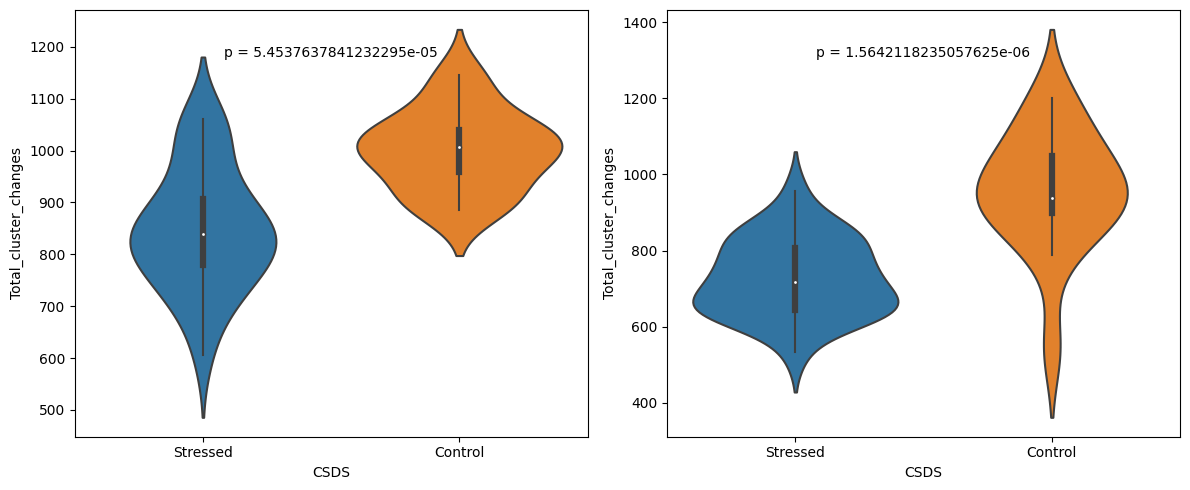

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(x="CSDS", y="Total_cluster_changes", data=total_changes.loc[total_changes["Session"] == "First"], ax=ax1)
sns.violinplot(x="CSDS", y="Total_cluster_changes", data=total_changes.loc[total_changes["Session"] == "Second"], ax=ax2)

# Add statsannotations
from scipy.stats import ttest_ind

first = total_changes.loc[total_changes["Session"] == "First", "Total_cluster_changes"]
second = total_changes.loc[total_changes["Session"] == "Second", "Total_cluster_changes"]

t1, p1 = ttest_ind(first.loc[total_changes["CSDS"] == "Control"], first.loc[total_changes["CSDS"] == "Stressed"])
t2, p2 = ttest_ind(second.loc[total_changes["CSDS"] == "Control"], second.loc[total_changes["CSDS"] == "Stressed"])

ax1.text(0.5, 0.9, "p = {}".format
            (p1*2), ha='center', va='center', transform=ax1.transAxes)
ax2.text(0.5, 0.9, "p = {}".format
            (p2*2), ha='center', va='center',
            transform=ax2.transAxes)

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_total_cluster_changes.pdf")
plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

dimred = TSNE(n_components=2)
concat_embeddings = np.vstack([embeddings[key] for key in embeddings.keys()])
concat_soft_counts = np.vstack([soft_counts[key] for key in soft_counts.keys()])
hard_counts = np.argmax(concat_soft_counts, axis=1)

random_indices = np.random.choice(concat_embeddings.shape[0], 15000, replace=False)
embs = dimred.fit_transform(concat_embeddings[random_indices])
hard_counts = hard_counts[random_indices]

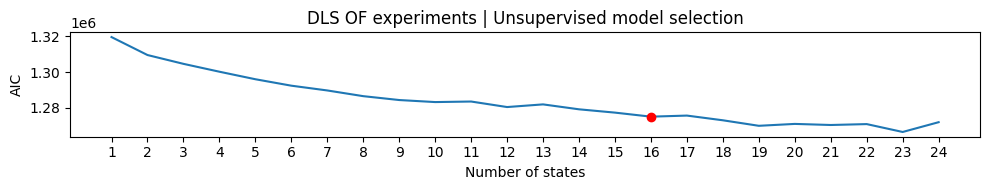

In [ ]:
with open("../DLS_data/DeepOF/SI/DLS_SI_project/Trained_models/hmm_trained_aic.pkl", "rb") as f:
    hmm_performance = pickle.load(f)[1]

plt.figure(figsize=(10, 2))
plt.plot(range(1, 25), hmm_performance)
plt.xlabel("Number of states")
plt.scatter(16, hmm_performance[15], color="red", zorder=10)
plt.ylabel("AIC")
plt.title("DLS OF experiments | Unsupervised model selection")
plt.xticks(range(1, 25))
plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_AIC_cluster_selection.pdf")
plt.show()

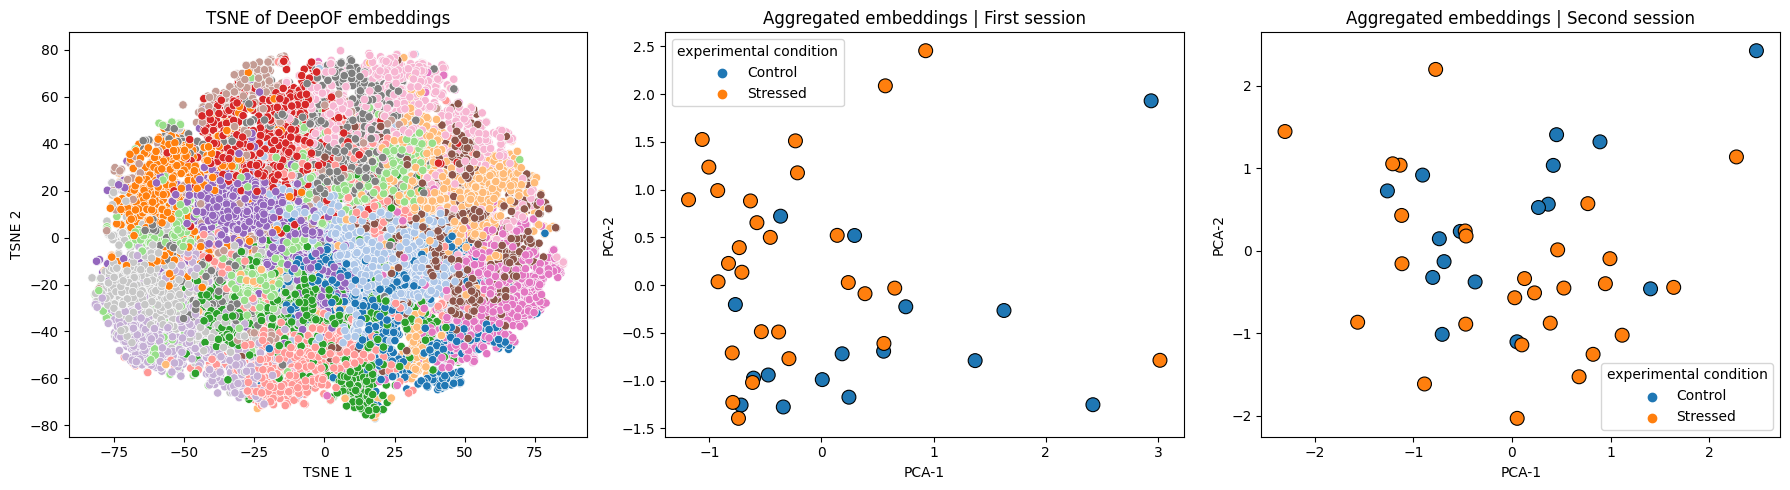

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=embs[:, 0], y=embs[:, 1], hue=hard_counts, palette="tab20", ax=ax1)
ax1.set_title("TSNE of DeepOF embeddings")
ax1.set_xlabel("TSNE 1")
ax1.set_ylabel("TSNE 2")
ax1.legend_.remove()

deepof.visuals.plot_embeddings(
    SI_deepof_project,
    embeddings.filter_condition({"Session": "First"}),
    soft_counts.filter_condition({"Session": "First"}),
    breaks.filter_condition({"Session": "First"}),
    aggregate_experiments="time on cluster",  # Can also be set to 'mean' and 'median'
    exp_condition="CSDS",
    show_aggregated_density=False,
    ax=ax2,
    save=False,  # Set to True, or give a custom name, to save the plot,
)
ax2.set_title("Aggregated embeddings | First session")

deepof.visuals.plot_embeddings(
    SI_deepof_project,
    embeddings.filter_condition({"Session": "Second"}),
    soft_counts.filter_condition({"Session": "Second"}),
    breaks.filter_condition({"Session": "Second"}),
    aggregate_experiments="time on cluster",  # Can also be set to 'mean' and 'median'
    exp_condition="CSDS",
    show_aggregated_density=False,
    ax=ax3,
    save=False,  # Set to True, or give a custom name, to save the plot,
)
ax3.set_title("Aggregated embeddings | Second session")

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_unsupervised_embeddings.pdf")
plt.show()

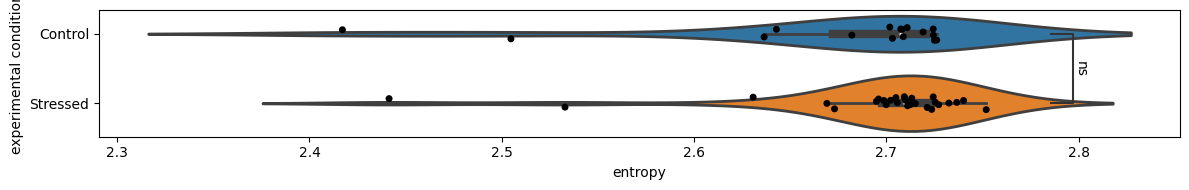

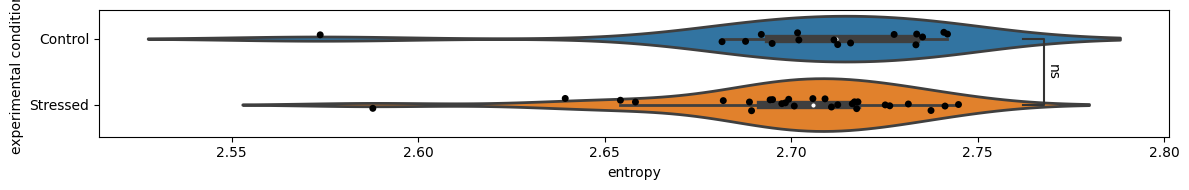

In [ ]:
# Entropy plots
fig, ax = plt.subplots(1, 1, figsize=(12, 2))

SI_entropy_CSDS_S1 = deepof.visuals.plot_stationary_entropy(
    SI_deepof_project,
    embeddings.filter_condition({"Session": "First"}),
    soft_counts.filter_condition({"Session": "First"}),
    breaks.filter_condition({"Session": "First"}),
    exp_condition="CSDS",
    ax=ax,
    return_data=True,
)
plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_entropy_CSDS_Session1.pdf")

fig, ax = plt.subplots(1, 1, figsize=(12, 2))

SI_entropy_CSDS_S2 = deepof.visuals.plot_stationary_entropy(
    SI_deepof_project,
    embeddings.filter_condition({"Session": "Second"}),
    soft_counts.filter_condition({"Session": "Second"}),
    breaks.filter_condition({"Session": "Second"}),
    exp_condition="CSDS",
    ax=ax,
    return_data=True,
)
plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_entropy_CSDS_Session2.pdf")

In [35]:
pd.concat([SI_entropy_CSDS_S1, SI_entropy_CSDS_S2]).reset_index(drop=True).to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_entropy_scores.csv")

### Plot results

Info! Set aggregate_experiments to -mean- since supervised annotations were given!
Info! Set aggregate_experiments to -mean- since supervised annotations were given!


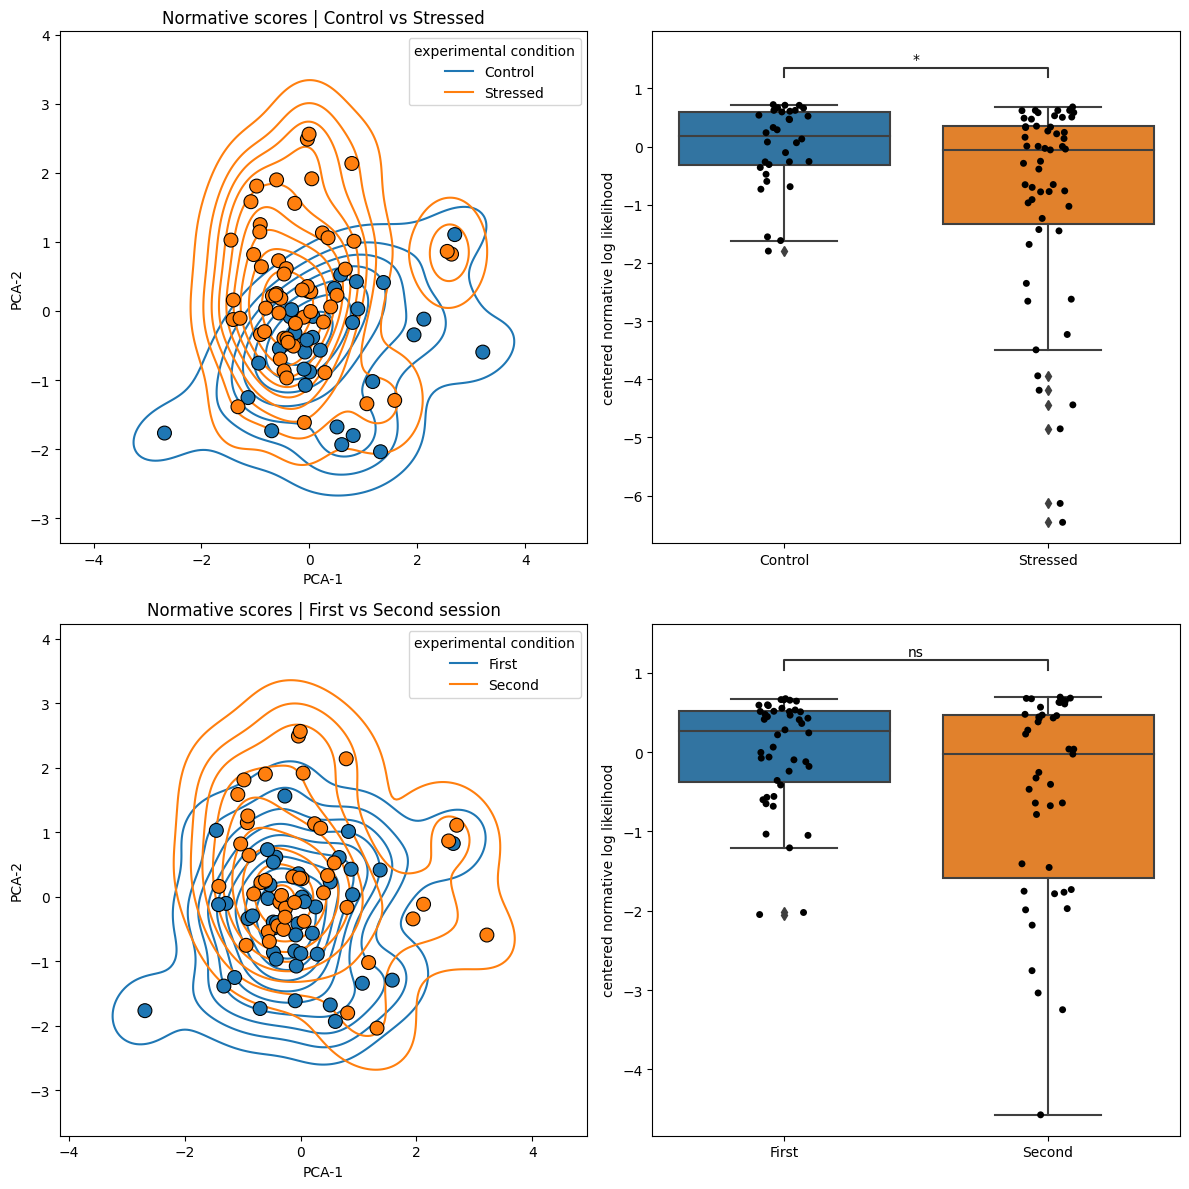

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

deepof.visuals.plot_embeddings(
    SI_deepof_project,
    supervised_annotations=supervised_annotation,
    exp_condition="CSDS",
    normative_model="Control",
    ax=[ax1, ax2],
)

deepof.visuals.plot_embeddings(
    SI_deepof_project,
    supervised_annotations=supervised_annotation,
    exp_condition="Session",
    normative_model="First",
    ax=[ax3, ax4],
)

ax1.set_title("Normative scores | Control vs Stressed")
ax3.set_title("Normative scores | First vs Second session")

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_normative_scores.pdf")
plt.show()

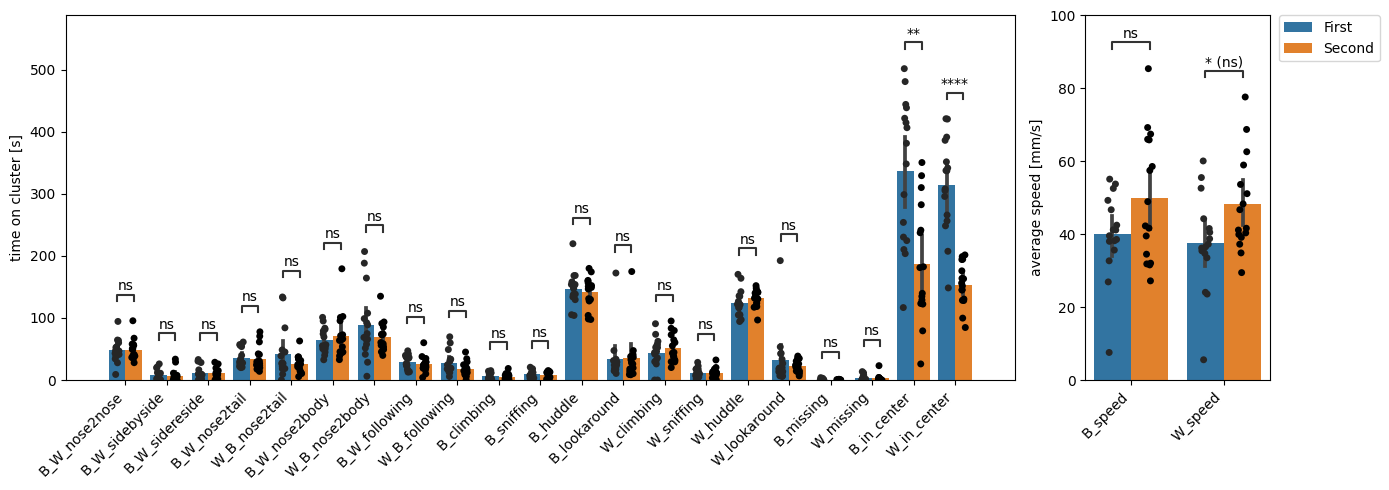

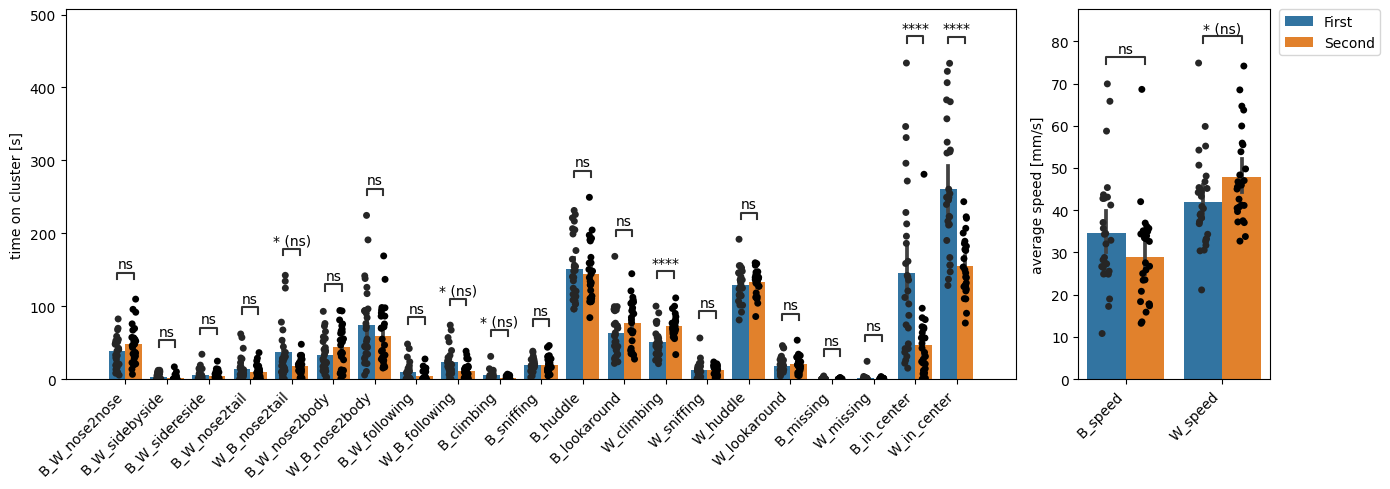

In [ ]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Control"}),
    exp_condition="Session",
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Control"}),
    exp_condition="Session",
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_enrichment_Sessions_control.pdf")
plt.show()

fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Stressed"}),
    exp_condition="Session",
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Stressed"}),
    exp_condition="Session",
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_enrichment_Sessions_stressed.pdf")
plt.show()

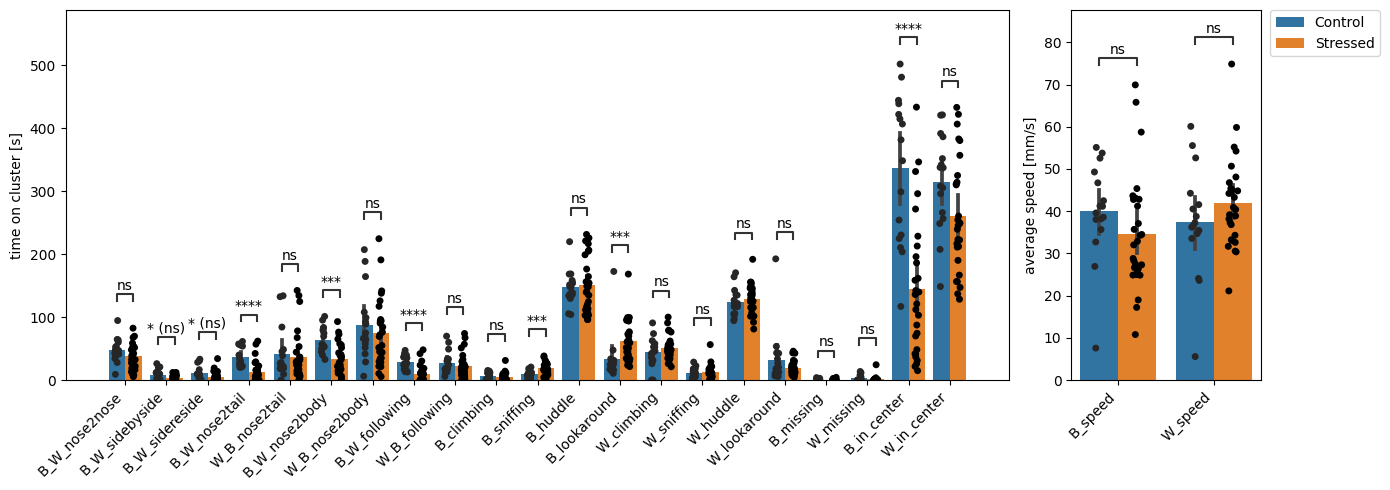

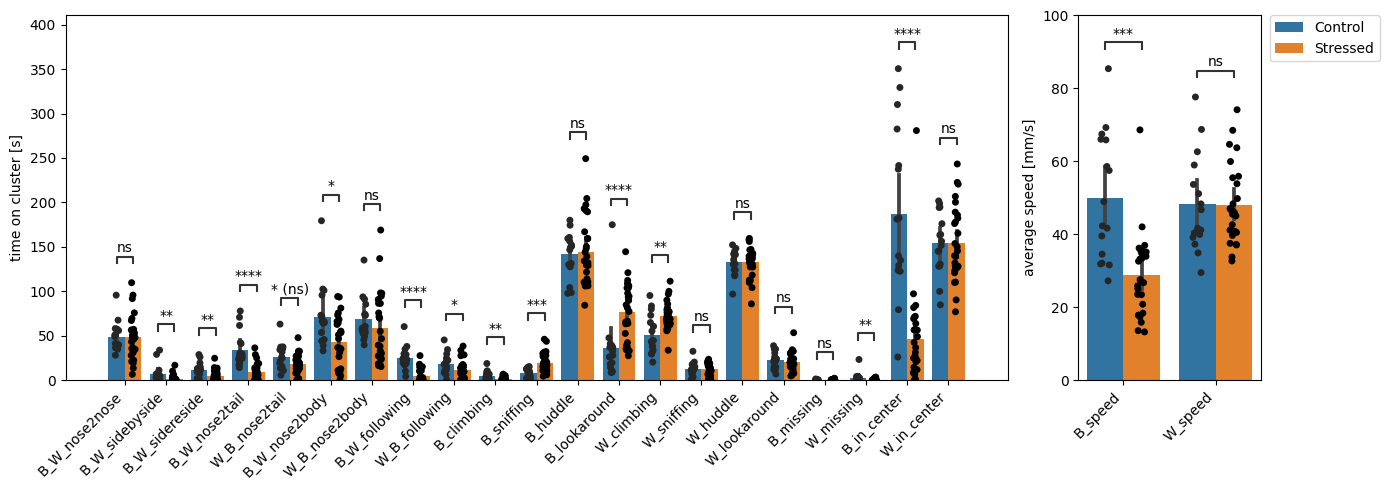

In [ ]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"Session":"First"}),
    exp_condition="CSDS",
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"Session":"First"}),
    exp_condition="CSDS",
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_enrichment_CSDS_session1.pdf")
plt.show()

fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"Session":"Second"}),
    exp_condition="CSDS",
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    SI_deepof_project,
    supervised_annotations=supervised_annotation.filter_condition({"Session":"Second"}),
    exp_condition="CSDS",
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/SI_enrichment_CSDS_session2.pdf")
plt.show()

### Basic visual exploration

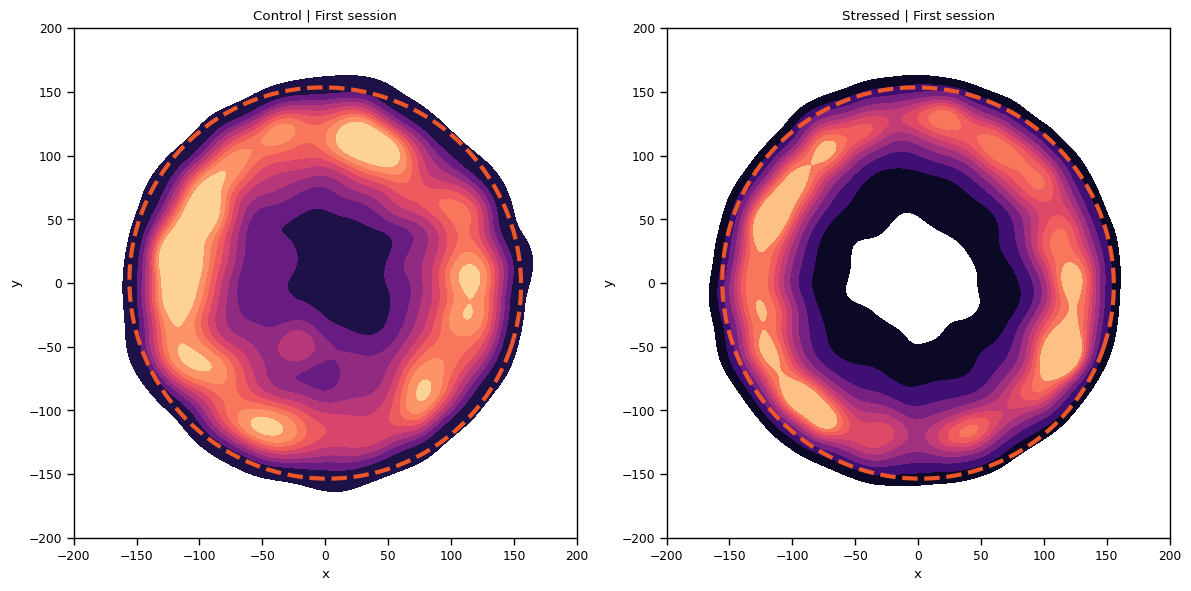

In [ ]:
sns.set_context("paper")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    SI_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition=["CSDS", "Session"],
    condition_value=["Control", "First"],
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
)

deepof.visuals.plot_heatmaps(
    SI_deepof_project,
    ["B_Nose"],
    center="arena",
    exp_condition=["CSDS", "Session"],
    condition_value=["Stressed", "First"],
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
)

# Set titles
ax1.set_title("Control | First session")
ax2.set_title("Stressed | First session")

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Center the axes
ax1.set_xlim(-200, 200)
ax1.set_ylim(-200, 200)
ax2.set_xlim(-200, 200)
ax2.set_ylim(-200, 200)

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/Control_vs_Stressed_First_session.pdf")
plt.show()

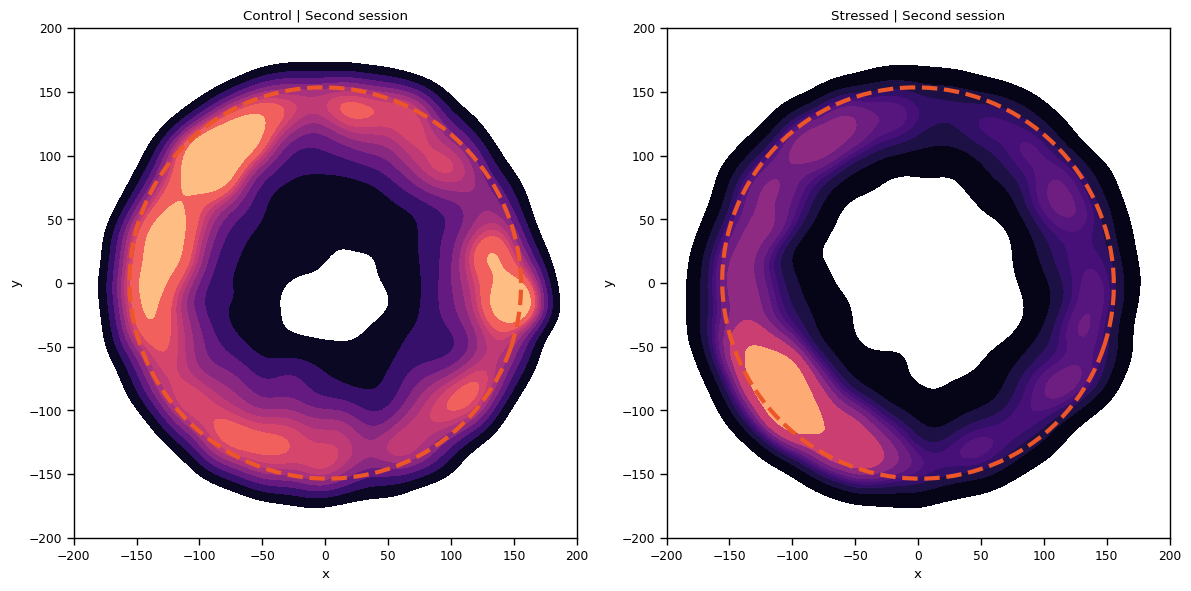

In [ ]:
sns.set_context("paper")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    SI_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition=["CSDS", "Session"],
    condition_value=["Control", "Second"],
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
)

deepof.visuals.plot_heatmaps(
    SI_deepof_project,
    ["B_Nose"],
    center="arena",
    exp_condition=["CSDS", "Session"],
    condition_value=["Stressed", "Second"],
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
)

# Set titles
ax1.set_title("Control | Second session")
ax2.set_title("Stressed | Second session")

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Center the axes
ax1.set_xlim(-200, 200)
ax1.set_ylim(-200, 200)
ax2.set_xlim(-200, 200)
ax2.set_ylim(-200, 200)

plt.tight_layout()
plt.savefig("../DLS_data/DeepOF/SI/DLS_SI_project/Figures/Control_vs_Stressed_Second_session.pdf")
plt.show()

### Domain-specific analyses

1. Center-zone behavior over time

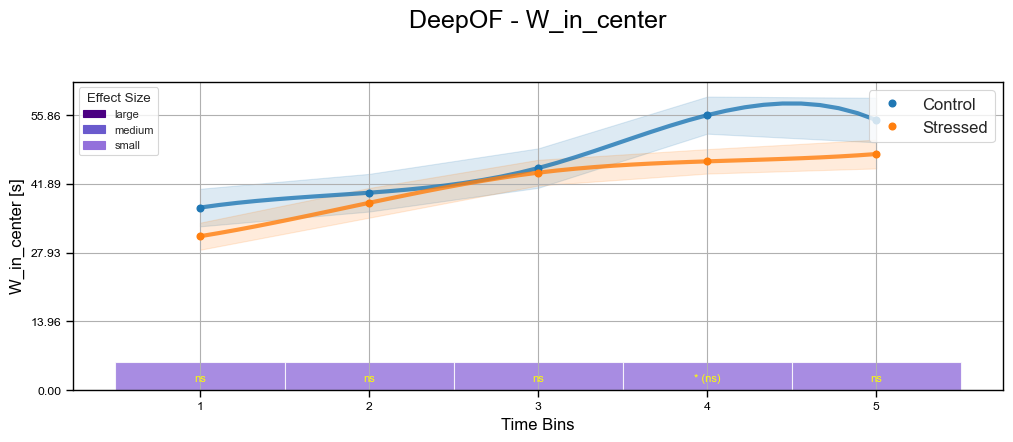

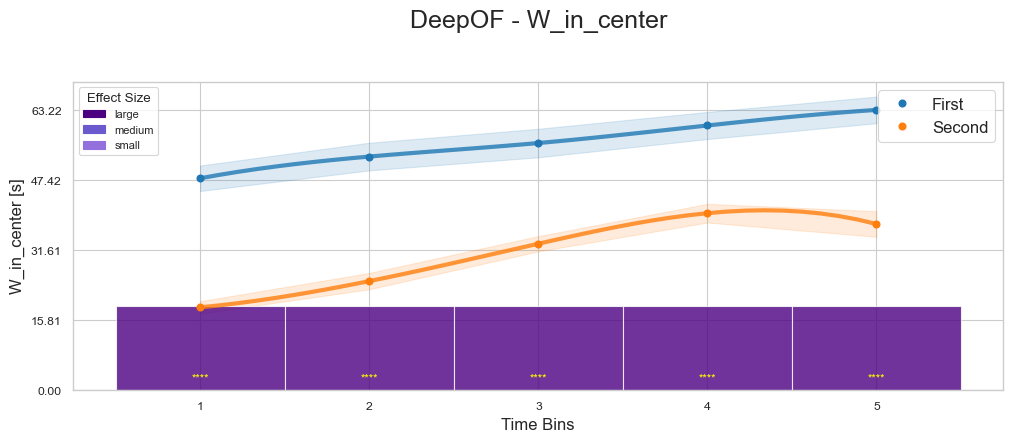

In [ ]:
# CD1 control (no differences expected)
W_CSDS_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation, 
    behavior_to_plot="W_in_center", 
    exp_condition="CSDS",
    N_time_bins=5,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

W_Session_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation, 
    behavior_to_plot="W_in_center", 
    exp_condition="Session",
    N_time_bins=5,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Save to disk
W_CSDS_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_CD1_CSDS_in_center_data.csv")
W_Session_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_CD1_Session_in_center_data.csv")

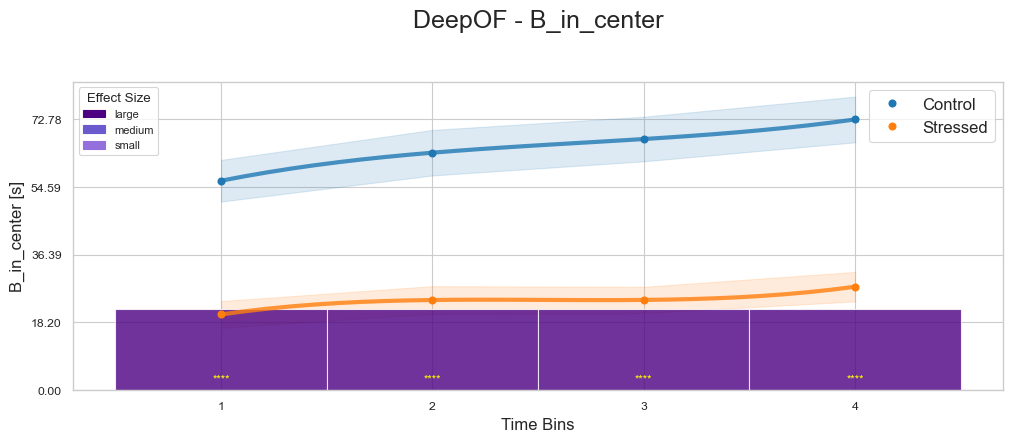

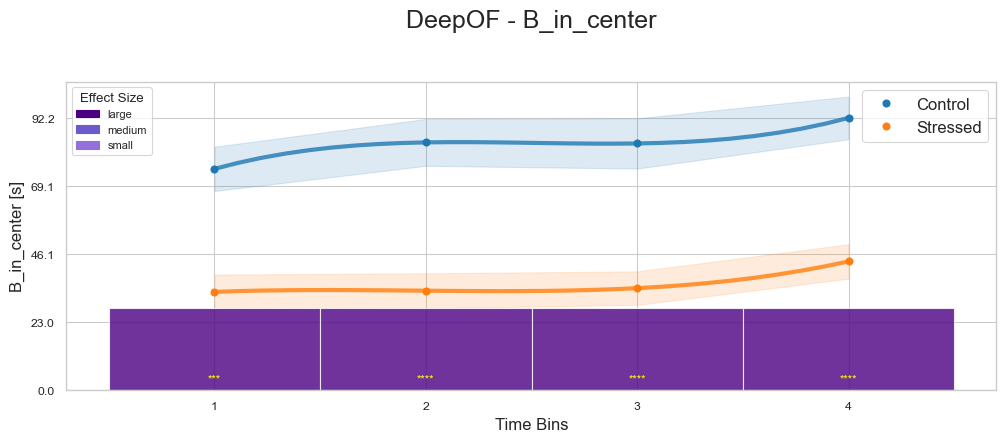

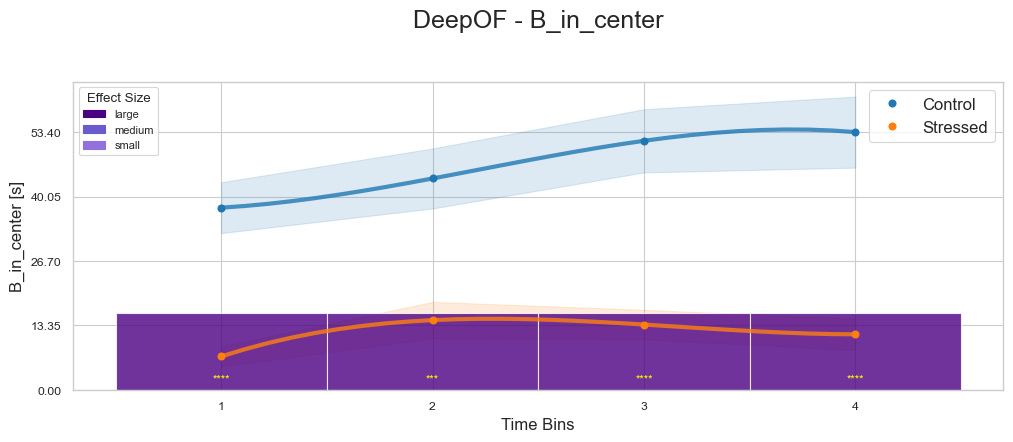

In [ ]:
# CSDS / Control 

# Both sessions
B_CSDS_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation, 
    behavior_to_plot="B_in_center", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# First session
B_CSDS_Session1_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"Session":"First"}), 
    behavior_to_plot="B_in_center", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Second session
B_CSDS_Session2_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"Session":"Second"}), 
    behavior_to_plot="B_in_center", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Save to disk
B_CSDS_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=both_in_center_data.csv")
B_CSDS_Session1_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session1_in_center_data.csv")
B_CSDS_Session2_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session2_in_center_data.csv")


B_CSDS_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=both_in_center_data.xlsx")
B_CSDS_Session1_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session1_in_center_data.xlsx")
B_CSDS_Session2_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session2_in_center_data.xlsx")

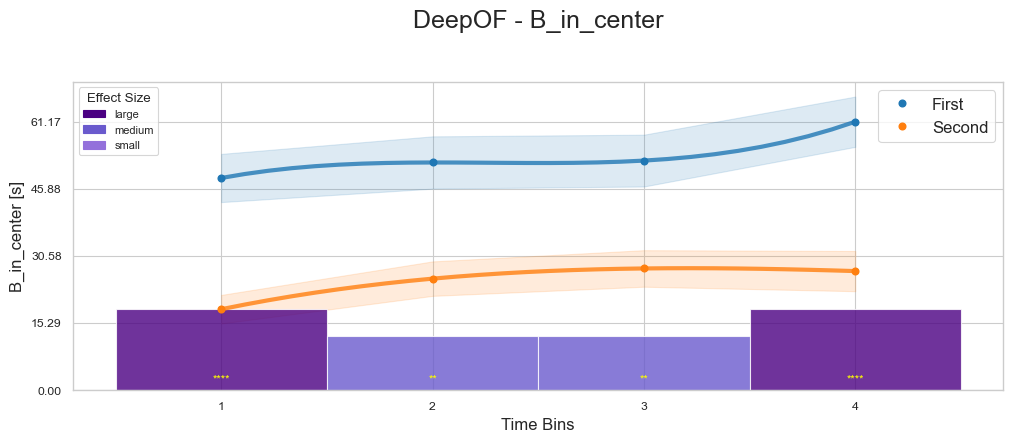

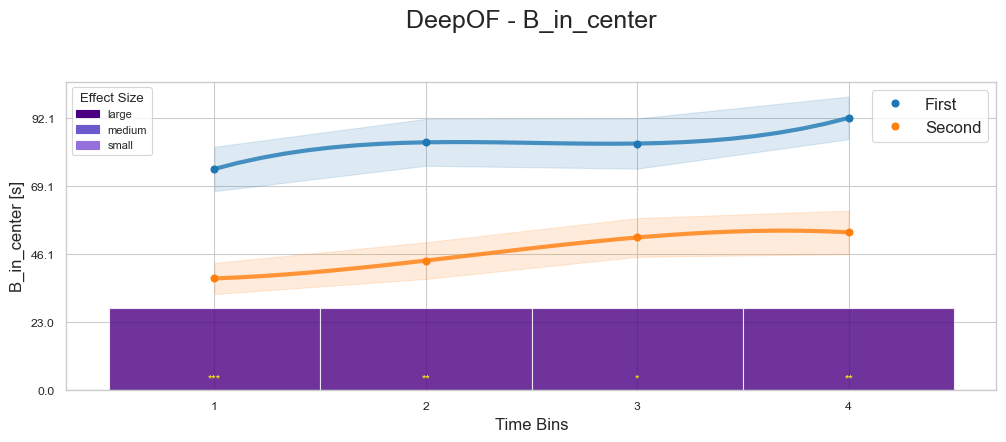

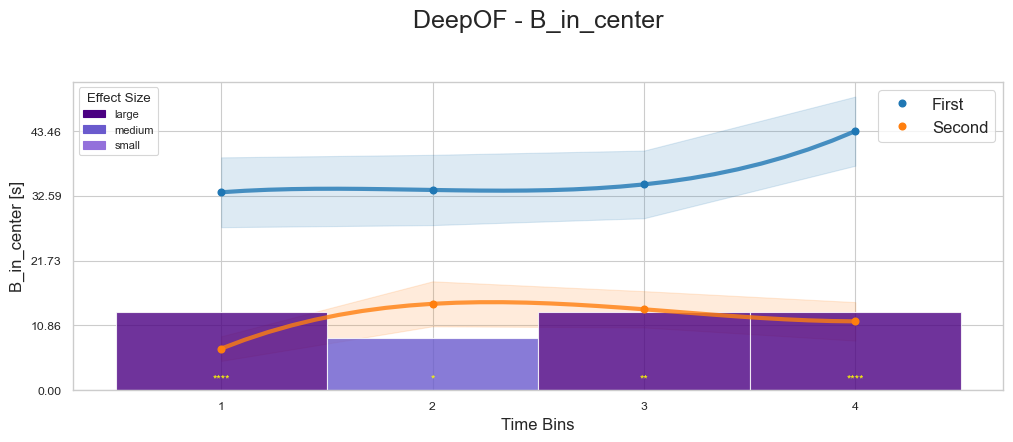

In [ ]:
# First / Second session

# Both sessions
B_Session_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation, 
    behavior_to_plot="B_in_center", 
    exp_condition="Session", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# First session
B_Session_Control_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Control"}), 
    behavior_to_plot="B_in_center", 
    exp_condition="Session", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Second session
B_Session_Stressed_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"CSDS":"Stressed"}), 
    behavior_to_plot="B_in_center", 
    exp_condition="Session", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Save to disk
B_Session_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_Session_CSDS=both_in_center_data.csv")
B_Session_Control_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Control_in_center_data.csv")
B_Session_Stressed_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Stressed_in_center_data.csv")


B_Session_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_Session_CSDS=both_in_center_data.xlsx")
B_Session_Control_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Control_in_center_data.xlsx")
B_Session_Stressed_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Stressed_in_center_data.xlsx")

# Nose to nose interaction over time bins

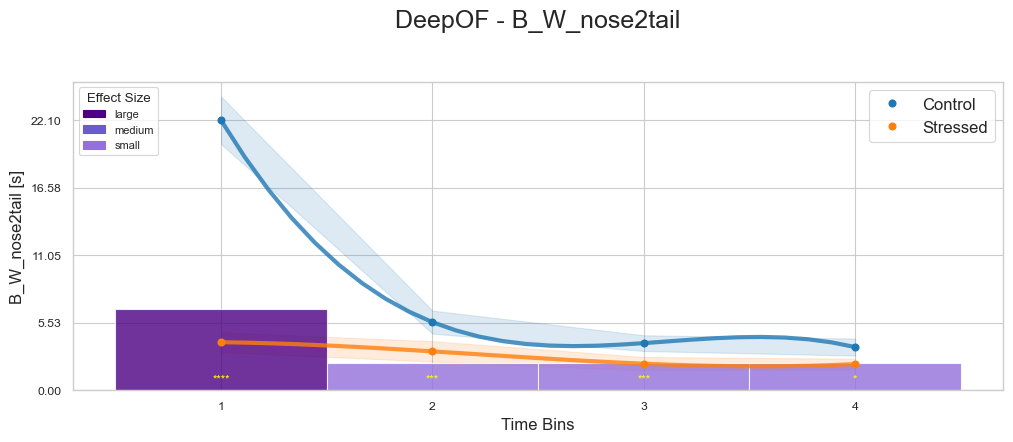

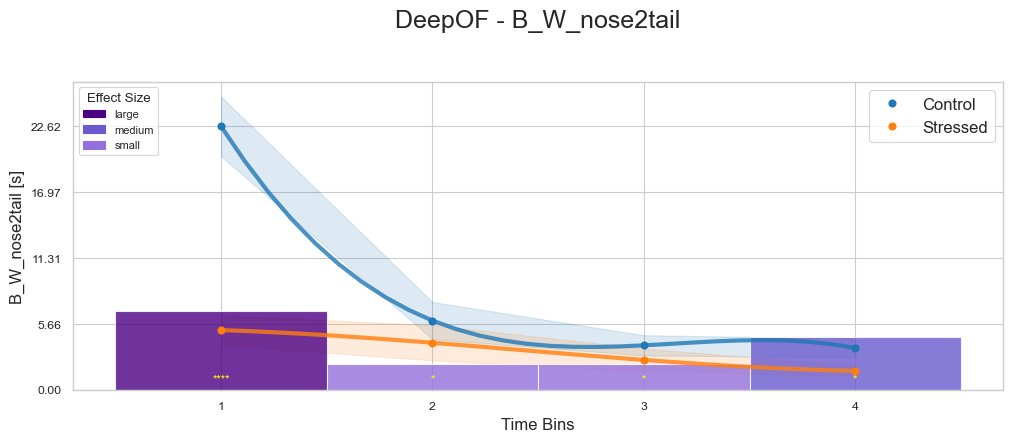

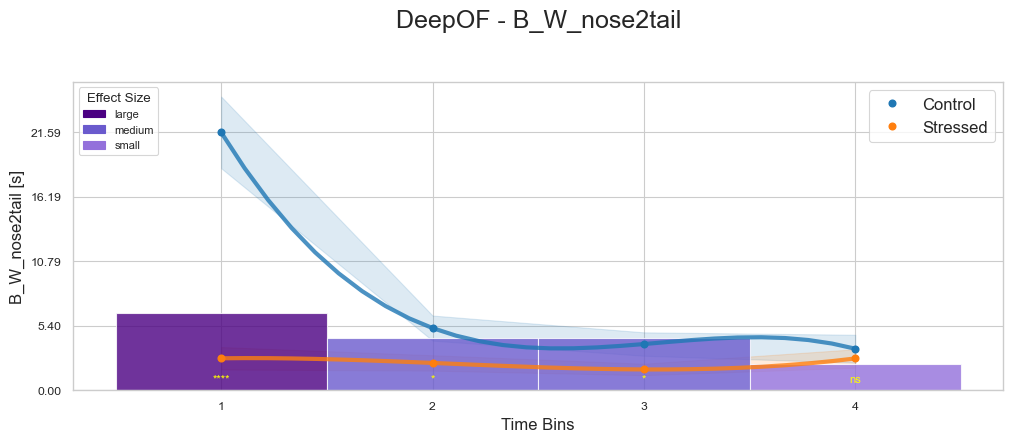

In [ ]:
# First / Second session

# Both sessions
B_Session_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation, 
    behavior_to_plot="B_W_nose2tail", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# First session
B_Session_Control_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"Session":"First"}), 
    behavior_to_plot="B_W_nose2tail", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Second session
B_Session_Stressed_in_center_data, _ = deepof.visuals.plot_behavior_trends(
    coordinates=SI_deepof_project, 
    supervised_annotations=supervised_annotation.filter_condition({"Session":"Second"}), 
    behavior_to_plot="B_W_nose2tail", 
    exp_condition="CSDS", 
    N_time_bins=4,
    polar_depiction=False,
    show_histogram=True,
    return_data=True,
    )

# Save to disk
B_Session_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=both_asniff_data.csv")
B_Session_Control_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session-first_asniff_data.csv")
B_Session_Stressed_in_center_data.to_csv("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=second_asniff_data.csv")

B_Session_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=both_asniff_data.xlsx")
B_Session_Control_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session-first_asniff_data.xlsx")
B_Session_Stressed_in_center_data.to_excel("../DLS_data/DeepOF/SI/DLS_SI_project/Output/SI_B6_CSDS_Session=second_asniff_data.xlsx")